# **AI CLASSIFICATION TO WATER QUALITY**
(https://www.kaggle.com/adityakadiwal/water-potability/code - link para o dataset utilizado)

# **IMPORTANDO DADOS e IMPORTANDO BIBLIOTECAS**

##### Bibliotecas que serão usadas:

In [ ]:
# Manipulação dos dados
import pandas as pd
import numpy as np

# Tratamento/Pré-Processamento e Otimização
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE 
from sklearn.model_selection import train_test_split 
from sklearn.model_selection import GridSearchCV

# Algorítmos de Aprendizado de Máquina
import sklearn
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm
import xgboost as xgb
from sklearn.ensemble import RandomForestClassifier

# Validação dos modelos
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

# Plotagem de gráficos
import matplotlib.pyplot as plt
import seaborn as sns

#### Detalhes do dataset:
- ppm: partes por milhão
- μg/L: micrograma por litro
- mg/L: miligrama por litro

#### Descrição das colunas:

1. ph: pH de 1. Água (0 a 14).
2. Dureza: Capacidade da água provocar a precipitação do sabão em mg/L.
3. Sólidos: Sólidos dissolvidos totais em ppm.
4. Cloraminas: Quantidade de cloraminas em ppm.
5. Sulfato: Quantidade de Sulfatos dissolvidos em mg/L.
6. Condutividade: Condutividade eléctrica da água em μS/cm.
7. Carbono_orgânico: Quantidade de carbono orgânico em ppm.
8. Trihalometanos: Quantidade de trihalometanos em μg/L.
9. Turvação: Medida da propriedade de emissão de luz da água na NTU.
10. Potabilidade: Indica se a água é segura para o consumo humano. Potabilidade -1 e Não potável -0

In [ ]:
dataset = pd.read_csv('/content/drive/MyDrive/water_potability.csv')

dataset

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0
...,...,...,...,...,...,...,...,...,...,...
3271,4.668102,193.681735,47580.991603,7.166639,359.948574,526.424171,13.894419,66.687695,4.435821,1
3272,7.808856,193.553212,17329.802160,8.061362,NaN,392.449580,19.903225,NaN,2.798243,1
3273,9.419510,175.762646,33155.578218,7.350233,NaN,432.044783,11.039070,69.845400,3.298875,1
3274,5.126763,230.603758,11983.869376,6.303357,NaN,402.883113,11.168946,77.488213,4.708658,1


# **TRATAMENTO E PRÉ-PROCESSAMENTO DOS DADOS:**

### Dados Faltantes:
- Problema será tratado colocando a média dos atributos nos valores que estiverem faltando.

In [ ]:
faltante={"Faltante (abs)":dataset.isnull().sum(),"Faltante (%)":round(((dataset.isnull().sum()/dataset.shape[0])*100),2)}
pd.DataFrame(faltante)

,Faltante (abs),Faltante (%)
ph,0,0.0
Hardness,0,0.0
Solids,0,0.0
Chloramines,0,0.0
Sulfate,0,0.0
Conductivity,0,0.0
Organic_carbon,0,0.0
Trihalomethanes,0,0.0
Turbidity,0,0.0
Potability,0,0.0


In [ ]:
dataset.fillna({'ph':dataset.ph.mean()}, inplace=True)
dataset.fillna({'Sulfate':dataset.Sulfate.mean()}, inplace=True)
dataset.fillna({'Trihalomethanes':dataset.Trihalomethanes.mean()}, inplace=True)

dataset.isnull().sum()

ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64

### Separação dos dados:
- Separando em X (input) de treino e teste, e y (output) de treino e teste.

In [ ]:
X = dataset.drop(['Potability'], axis=1)
y = dataset.Potability  

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.20, random_state=2021)

In [ ]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(2620, 9)
(656, 9)
(2620,)
(656,)


### Padronização dos dados:
- Como será utlizado alguns modelos que são sensíveis a dados com dimensionamento desnivelado, será aplicado uma padronização nos dados (traz o conjunto de dados para média=0 e desvio padrão=1);
- A padronização é feita a partir da fórmula: 
$$
  (x - Média)/Desvio Padrão
$$

In [ ]:
scaler = StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

dataset_standart_treino = pd.DataFrame(data=X_train.tolist(),
                    columns=['ph',	'Hardness',	'Solids',	'Chloramines',	'Sulfate',	'Conductivity',	'Organic_carbon',	'Trihalomethanes',	'Turbidity'])
dataset_standart_treino['Potability']=y_train.tolist()

dataset_standart_teste = pd.DataFrame(data=X_test.tolist(),
                    columns=['ph',	'Hardness',	'Solids',	'Chloramines',	'Sulfate',	'Conductivity',	'Organic_carbon',	'Trihalomethanes',	'Turbidity'])
dataset_standart_teste['Potability']=y_test.tolist()

In [ ]:
dataset_standart_treino.head(n=3)

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,-0.669451,1.254109,-0.182316,0.841167,0.004611,-1.685938,1.488390,1.701150,-1.000754,0
1,-0.111296,0.155063,-0.626624,0.844434,0.669372,-1.128834,1.986151,-0.360752,0.366608,0
2,-0.003552,0.244609,1.245322,-0.713884,-0.250474,-1.084264,-2.951119,0.313730,1.212820,0


In [ ]:
dataset_standart_teste.head(n=3)

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,1.582896,-0.680888,-1.507978,0.840124,0.679190,2.103836,0.742867,2.468233,0.828742,0
1,-1.661291,-0.416603,1.394603,-0.586048,-0.719524,0.148857,-1.964698,0.010662,0.215314,1
2,-0.253976,1.082117,0.218537,-0.319960,0.004611,0.451232,-0.119215,0.756263,-0.693006,0


In [ ]:
print(dataset.shape)
print(dataset_standart_treino.shape)
print(dataset_standart_teste.shape)

(3276, 10)
(2620, 10)
(656, 10)


### Balanceando atributo alvo: 
- Para resolver o problema do desbalanceamento, será aplicado a técnica conehcida como Smote (gera dados sintéticos (não duplicados) da classe minoritária a partir de "vizinhos").

In [ ]:
dataset_standart_treino['Potability'].value_counts()

0    1606
1    1014
Name: Potability, dtype: int64

In [ ]:
X_ = dataset_standart_treino.drop(['Potability'], axis=1)
y_ = dataset_standart_treino.Potability 

In [ ]:
smote = SMOTE(random_state=1)
X_train_, y_train_ = smote.fit_resample(X_, y_)

In [ ]:
dataset_treino_final = pd.DataFrame(X_train_, 
                     columns=['ph',	'Hardness',	'Solids',	'Chloramines',	'Sulfate',	'Conductivity',	'Organic_carbon',	'Trihalomethanes',	'Turbidity'])
dataset_treino_final['Potability']=y_train_

dataset_treino_final.head(n=3)

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,-0.669451,1.254109,-0.182316,0.841167,0.004611,-1.685938,1.488390,1.701150,-1.000754,0
1,-0.111296,0.155063,-0.626624,0.844434,0.669372,-1.128834,1.986151,-0.360752,0.366608,0
2,-0.003552,0.244609,1.245322,-0.713884,-0.250474,-1.084264,-2.951119,0.313730,1.212820,0


In [ ]:
dataset_treino_final['Potability'].value_counts()

1    1606
0    1606
Name: Potability, dtype: int64

# **TREINAMENTO e VALIDAÇÃO DE MODELOS:**
- Para o treinamento será utilizado um GridSearch (técnica que acha os melhores parametros para o modelo com aquele conjunto de dados);
- Será usado a fim de experimento e comparação, mais de um modelo:
  - DecisionTreeClassifier;
  - SVM (algorítmo sensível ao dimensionamento dos dados);
  - XGBClassifier;
  - RandomForestClassifier (exemplo de algorítmo NÃO sensível ao dimensionamento dos dados);

##### Separação dos dados:
- Separando em X (input) de treino e teste, e y (output) de treino e teste.

In [ ]:
X_train_final = dataset_treino_final.drop(['Potability'], axis=1)
y_train_final = dataset_treino_final.Potability

X_test_final = dataset_standart_teste.drop(['Potability'], axis=1)
y_test_final = dataset_standart_teste.Potability

In [ ]:
print(X_train_final.shape)
print(X_test_final.shape)
print(y_train_final.shape)
print(y_test_final.shape)

(3212, 9)
(656, 9)
(3212,)
(656,)


##### DecisionTree:

In [ ]:
tree_param = {
    'criterion':['gini','entropy'],
    'max_depth':[4,5,6,7,8,9,10,11,12,15,20,30,40,50,70,90,120,150]
}

clf_tree = GridSearchCV(DecisionTreeClassifier(random_state=1), tree_param, cv=5)
clf_tree.fit(X_train_final, y_train_final) #trinta segundos

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=1),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [4, 5, 6, 7, 8, 9, 10, 11, 12, 15, 20, 30,
                                       40, 50, 70, 90, 120, 150]})

In [ ]:
pred_tree = clf_tree.predict(X_test_final)
confusion_matrix(y_test_final, pred_tree)

array([[237, 155],
       [139, 125]])

In [ ]:
print(classification_report(y_test_final, pred_tree))

              precision    recall  f1-score   support

           0       0.63      0.60      0.62       392
           1       0.45      0.47      0.46       264

    accuracy                           0.55       656
   macro avg       0.54      0.54      0.54       656
weighted avg       0.56      0.55      0.55       656



##### SupportVectorMachine (SVM):

In [ ]:
svm_param = {
    'C': [0.1, 1, 10, 100, 1000],
    'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
    'kernel': ['rbf']
}

clf_svm = GridSearchCV(svm.SVC(random_state=1), svm_param, cv=5)
clf_svm.fit(X_train_final, y_train_final) # dois minutos

GridSearchCV(cv=5, estimator=SVC(random_state=1),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']})

In [ ]:
pred_svm = clf_svm.predict(X_test_final)
confusion_matrix(y_test_final, pred_svm)

array([[336,  56],
       [197,  67]])

In [ ]:
print(classification_report(y_test_final, pred_svm))

              precision    recall  f1-score   support

           0       0.63      0.86      0.73       392
           1       0.54      0.25      0.35       264

    accuracy                           0.61       656
   macro avg       0.59      0.56      0.54       656
weighted avg       0.60      0.61      0.57       656



##### XGBClassifier:

In [ ]:
xgb_param = {
        'min_child_weight': [1, 5, 10],
        'gamma': [0.5, 1, 1.5, 2, 5],
        'subsample': [0.6, 0.8, 1.0],
        'colsample_bytree': [0.6, 0.8, 1.0],
        'max_depth': [3, 4, 5]
}

clf_xgb = GridSearchCV(xgb.XGBClassifier(random_state=1), xgb_param, cv=5)
clf_xgb.fit(X_train_final, y_train_final) # 5 min

GridSearchCV(cv=5, estimator=XGBClassifier(random_state=1),
             param_grid={'colsample_bytree': [0.6, 0.8, 1.0],
                         'gamma': [0.5, 1, 1.5, 2, 5], 'max_depth': [3, 4, 5],
                         'min_child_weight': [1, 5, 10],
                         'subsample': [0.6, 0.8, 1.0]})

In [ ]:
pred_xgb = clf_xgb.predict(X_test_final)
confusion_matrix(y_test_final, pred_xgb)

array([[248, 144],
       [115, 149]])

In [ ]:
print(classification_report(y_test_final, pred_xgb))

              precision    recall  f1-score   support

           0       0.68      0.63      0.66       392
           1       0.51      0.56      0.54       264

    accuracy                           0.61       656
   macro avg       0.60      0.60      0.60       656
weighted avg       0.61      0.61      0.61       656



##### RandomForest (RFC):

In [ ]:
rfc_param = {
    'n_estimators': [200, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth': [4,5,6,7,8],
    'criterion': ['gini', 'entropy']
}

clf_rfc = GridSearchCV(estimator=RandomForestClassifier(random_state=1), param_grid=rfc_param, cv=5)
clf_rfc.fit(X_train_final, y_train_final) #9 min

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=1),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [4, 5, 6, 7, 8],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [200, 500]})

In [ ]:
pred_rfc = clf_rfc.predict(X_test_final)
confusion_matrix(y_test_final, pred_rfc)

array([[281, 111],
       [136, 128]])

In [ ]:
print(classification_report(y_test_final, pred_rfc))

              precision    recall  f1-score   support

           0       0.67      0.72      0.69       392
           1       0.54      0.48      0.51       264

    accuracy                           0.62       656
   macro avg       0.60      0.60      0.60       656
weighted avg       0.62      0.62      0.62       656



# **FEATURE IMPORTANCE**

##### XGBClassifier:

In [ ]:
clf_xgb.best_params_

{'colsample_bytree': 1.0,
 'gamma': 0.5,
 'max_depth': 5,
 'min_child_weight': 1,
 'subsample': 0.6}

In [ ]:
xgbc = xgb.XGBClassifier(colsample_bytree=1.0, gamma=1.5, max_depth=3, min_child_weight=5, subsample=1.0, random_state=1)
xgbc.fit(X_train_final, y_train_final)

XGBClassifier(colsample_bytree=1.0, gamma=1.5, min_child_weight=5,
              random_state=1, subsample=1.0)

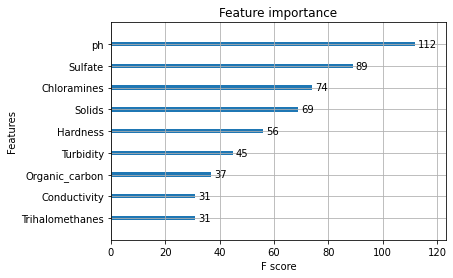

In [ ]:
xgb.plot_importance(xgbc)
plt.rcParams['figure.figsize'] = [10, 6]
plt.show()

##### RandomForest (RFC):

In [ ]:
feature_importance = clf_rfc.best_estimator_.feature_importances_
columns = dataset.columns[:-1]

print(feature_importance)
print(columns)

[0.1953677  0.11650999 0.11858949 0.10939255 0.17742615 0.07128952
 0.07373192 0.06584655 0.07184612]
Index(['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity',
       'Organic_carbon', 'Trihalomethanes', 'Turbidity'],
      dtype='object')


Text(0.5, 1.0, 'Peso de cada feature')

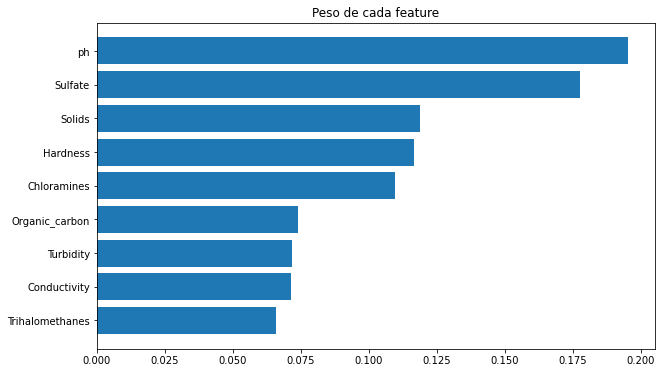

In [ ]:
id_ordenado = feature_importance.argsort()

plt.figure(figsize=(10,6))
plt.barh(columns[id_ordenado], feature_importance[id_ordenado])
plt.title('Peso de cada feature')

# **ANÁLISE DE DESEMPENHO DOS CLASSIFICADORES:**

### ORGANIZANDO OS RESULTADOS:

In [ ]:
result_models = pd.DataFrame({
    'Precisão (0)%': {'DecisionTree': 63, 'SVM': 63, 'XGBoost': 68, 'RandomForest':67},
    'Precisão (1)%': {'DecisionTree': 45, 'SVM': 54, 'XGBoost': 51, 'RandomForest':54},
    'Revocação (0)%': {'DecisionTree': 60, 'SVM': 86, 'XGBoost': 63, 'RandomForest':72},
    'Revocação (1)%': {'DecisionTree': 47, 'SVM': 25, 'XGBoost': 56, 'RandomForest':48},
    'F1-score (0)%': {'DecisionTree': 62, 'SVM': 73, 'XGBoost': 66, 'RandomForest':69}, 
    'F1-score (1)%': {'DecisionTree': 46, 'SVM': 35, 'XGBoost': 54, 'RandomForest':51}, 
    'Acurácia %': {'DecisionTree': 55, 'SVM': 61, 'XGBoost': 61, 'RandomForest':62}
})

result_models

,Precisão (0)%,Precisão (1)%,Revocação (0)%,Revocação (1)%,F1-score (0)%,F1-score (1)%,Acurácia %
DecisionTree,63,45,60,47,62,46,55
SVM,63,54,86,25,73,35,61
XGBoost,68,51,63,56,66,54,61
RandomForest,67,54,72,48,69,51,62


In [ ]:
result_models.to_csv('/content/drive/MyDrive/result_models.csv')

### DEFININDO FUNÇÃO:

In [ ]:
def line_plot(column1, column2, column):
  if column2 == None:
    plt.figure(figsize=(12,7))
    plt.plot(result_models[column1])
  else:
    plt.figure(figsize=(12,7))
    plt.plot(result_models[column1], label='Classe 0')
    plt.plot(result_models[column2], label='Classe 1')
    plt.legend()

  plt.ylabel(column)

### PLOTS:

Text(0.5, 1.0, 'PRECISÃO POR CLASSIFICADOR')

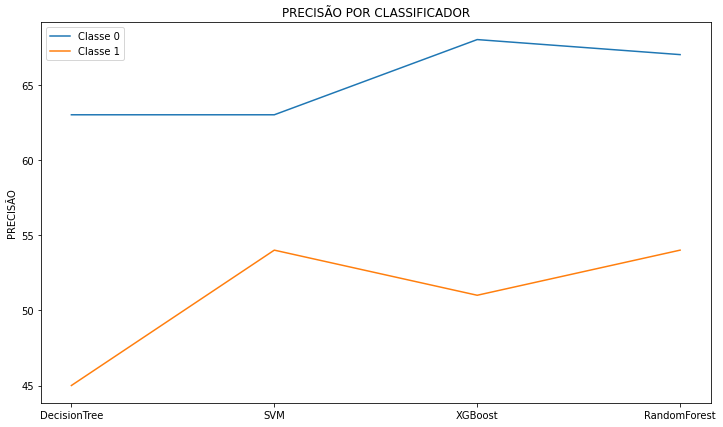

In [ ]:
line_plot('Precisão (0)%', 'Precisão (1)%', 'PRECISÃO')
plt.title('PRECISÃO POR CLASSIFICADOR')

Text(0.5, 1.0, 'REVOCAÇÃO POR CLASSIFICADOR')

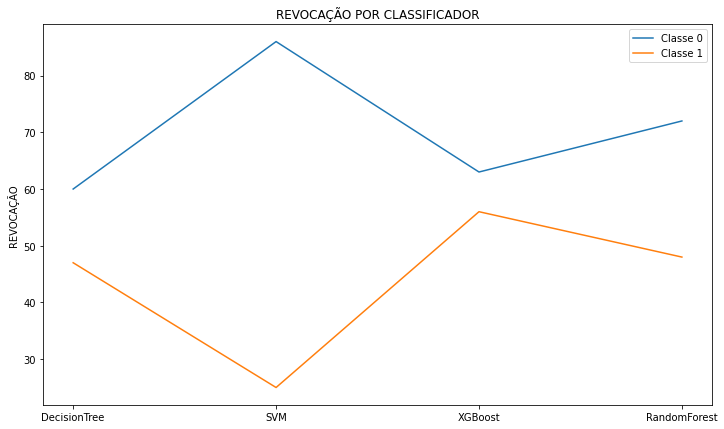

In [ ]:
line_plot('Revocação (0)%', 'Revocação (1)%', 'REVOCAÇÃO')
plt.title('REVOCAÇÃO POR CLASSIFICADOR')

Text(0.5, 1.0, 'F1-SCORE POR CLASSIFICADOR')

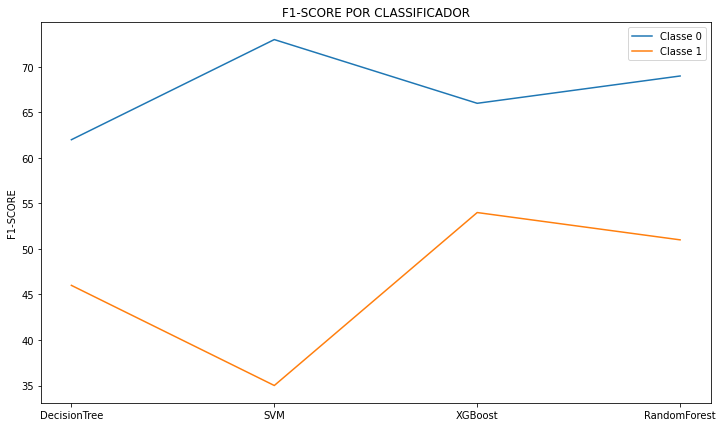

In [ ]:
line_plot('F1-score (0)%', 'F1-score (1)%', 'F1-SCORE')
plt.title('F1-SCORE POR CLASSIFICADOR')

Text(0.5, 1.0, 'ACURÁCIA POR CLASSIFICADOR')

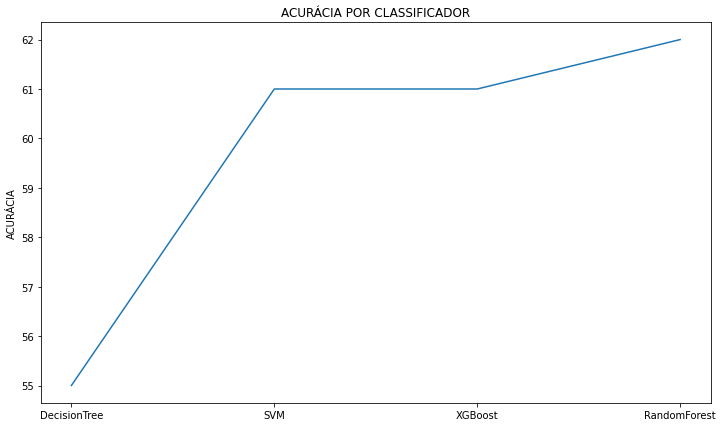

In [ ]:
line_plot('Acurácia %', None, 'ACURÁCIA')
plt.title('ACURÁCIA POR CLASSIFICADOR')